# Prediksi Penerimaan Beasiswa - Naive Byes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('beasiswa.csv')

In [3]:
df.head()

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,IPK2,Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa
0,1,GALAN PRASETIO,D III Keperawatan | Reguler,L,Dekat,SMAN 1 GEDONG TATAAN,2020,21,Ikut,Ikut,"3,57",Sangat Baik,Wiraswasta,Sedang,4,NaN
1,2,FINGKY RANDIANSYAH,D III Keperawatan | Reguler,L,Dekat,SMK HAMPAR BAIDURI,2020,21,Tidak,Ikut,"2,95",Baik,Buruh,Sedang,2,NaN
2,3,ADELIA PANE,D III Keperawatan | Reguler,P,Dekat,SMK HAMPAR BAIDURI,2020,21,Tidak,Ikut,"3,67",Sangat Baik,Petani,Sedang,4,NaN
3,4,DWI HANDOKO,D III Keperawatan | Reguler,L,Dekat,SMA MA'ARIF NU BUMIRESTU,2020,21,Tidak,Ikut,"3,19",Baik,Wiraswasta,Tinggi,2,NaN
4,5,DESTRI FERAWANTI GUSTINI,D III Keperawatan | Reguler,P,Jauh,SMA 2 NEGERI AGUNG,2020,21,Tidak,Ikut,"3,19",Baik,Wiraswasta,Sedang,2,NaN


### Data Cleaning

In [4]:
df.isna().sum()

No                                      0
Nama Lengkap                            0
Prodi                                   0
Jenis Kelamin                           0
Jarak Tempat Tinggal kekampus (Km)      0
Asal Sekolah                            0
Tahun Lulus                             0
SKS                                     0
Ikut Organisasi                         0
Ikut UKM                                0
IPK                                     0
IPK2                                    0
Pekerjaan Orang Tua                     0
Penghasilan                             0
Tanggungan                              0
Status Beasiswa                       596
dtype: int64

In [5]:
df.shape

(596, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  596 non-null    int64  
 1   Nama Lengkap                        596 non-null    object 
 2   Prodi                               596 non-null    object 
 3   Jenis Kelamin                       596 non-null    object 
 4   Jarak Tempat Tinggal kekampus (Km)  596 non-null    object 
 5   Asal Sekolah                        596 non-null    object 
 6   Tahun Lulus                         596 non-null    int64  
 7   SKS                                 596 non-null    int64  
 8   Ikut Organisasi                     596 non-null    object 
 9   Ikut UKM                            596 non-null    object 
 10  IPK                                 596 non-null    object 
 11  IPK2                                596 non-n

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
591    False
592    False
593    False
594    False
595    False
Length: 596, dtype: bool

### Asumsi Variabel Dependent (Status Beasiswa)

Dikarenakan feature "Status Beasiswa" memiliki nilai NaN yang tentu membuat model tidak dapat melakukan pembelajaran terhadap data missing values, oleh karena itu saya asumsikan bahwa pendaftar yang berhak untuk mendapatkan beasiswa adalah sebagai berikut 

- IPK : >= 3.50
- Mengikuti Organisasi OR UMKM
- Penghasilan orang tua sedang jika tanggungan > 2 anak OR Pengahasilan orang tua rendah jika tanggungan >= 1 anak

In [8]:
df['IPK'] = df['IPK'].str.replace(',', '.').astype(float)

In [9]:
def hak_beasiswa(row):
    if row['IPK'] >= 3.50 and \
       (row['Ikut Organisasi'] == 'Ikut' or row['Ikut UKM'] == 'Ikut') and \
       ((row['Penghasilan'] == 'Sedang' and row['Tanggungan'] > 2) or (row['Penghasilan'] == 'Rendah' and row['Tanggungan'] >= 1)):
        return 'Beasiswa'
    else:
        return 'Tidak Layak Beasiswa'

In [10]:
df['Status Beasiswa'] = df.apply(hak_beasiswa, axis=1)

In [11]:
def hitung_beasiswa(df):
    count_beasiswa = 0
    count_tidak_beasiswa = 0
    
    for index, row in df.iterrows():
        if hak_beasiswa(row) == 'Beasiswa':
            count_beasiswa += 1
        else:
            count_tidak_beasiswa += 1
    
    return count_beasiswa, count_tidak_beasiswa

total_beasiswa, total_tidak_beasiswa = hitung_beasiswa(df)

print("Total mahasiswa yang berhak menerima beasiswa:", total_beasiswa)
print("Total mahasiswa yang tidak layak menerima beasiswa:", total_tidak_beasiswa)

Total mahasiswa yang berhak menerima beasiswa: 81
Total mahasiswa yang tidak layak menerima beasiswa: 515


### Pre processing & EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  596 non-null    int64  
 1   Nama Lengkap                        596 non-null    object 
 2   Prodi                               596 non-null    object 
 3   Jenis Kelamin                       596 non-null    object 
 4   Jarak Tempat Tinggal kekampus (Km)  596 non-null    object 
 5   Asal Sekolah                        596 non-null    object 
 6   Tahun Lulus                         596 non-null    int64  
 7   SKS                                 596 non-null    int64  
 8   Ikut Organisasi                     596 non-null    object 
 9   Ikut UKM                            596 non-null    object 
 10  IPK                                 596 non-null    float64
 11  IPK2                                596 non-n

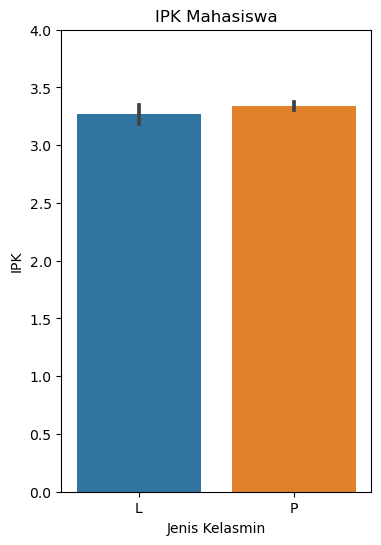

In [13]:
plt.figure(figsize=(4, 6))

# Barplot IPK
sns.barplot(x='Jenis Kelamin', y='IPK', data=df)
plt.title('IPK Mahasiswa')
plt.xlabel('Jenis Kelasmin')
plt.ylabel('IPK')
plt.ylim(0, 4) 
plt.show()

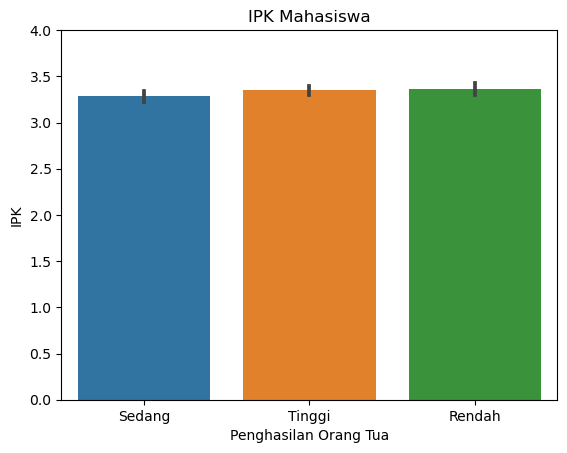

In [14]:
# Barplot IPK
sns.barplot(x='Penghasilan', y='IPK', data=df)
plt.title('IPK Mahasiswa')
plt.xlabel('Penghasilan Orang Tua')
plt.ylabel('IPK')
plt.ylim(0, 4) 
plt.show()

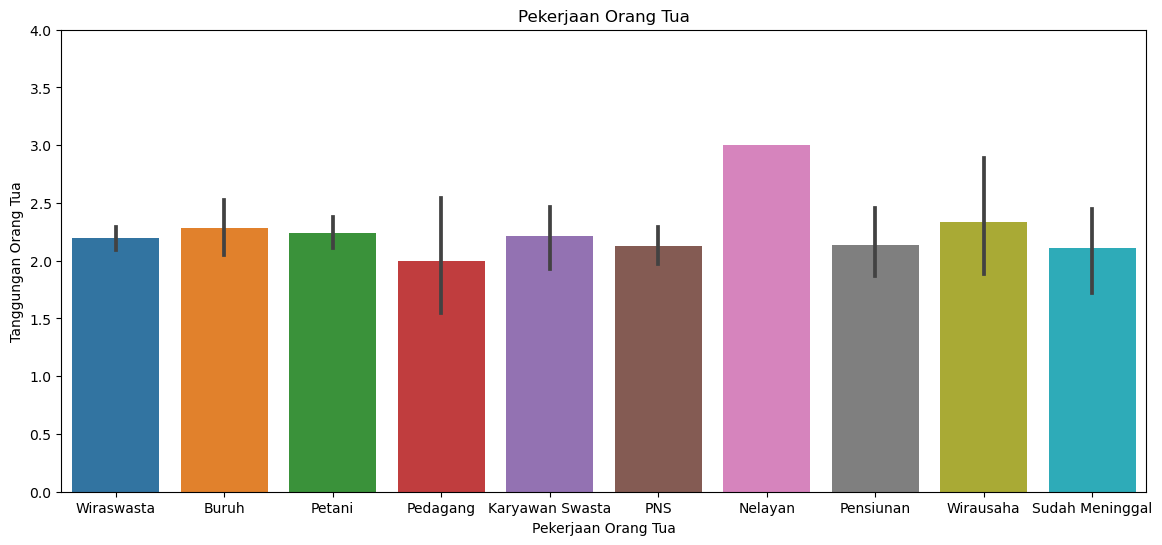

In [15]:
plt.figure(figsize=(14, 6))
# Barplot Prodi
sns.barplot(x='Pekerjaan Orang Tua', y='Tanggungan', data=df)
plt.title('Pekerjaan Orang Tua')
plt.xlabel('Pekerjaan Orang Tua')
plt.ylabel('Tanggungan Orang Tua')
plt.ylim(0, 4) 
plt.show()

### One Hot Encoding

#### Data Nominal

In [16]:
beasiswa = {'Tidak Layak Beasiswa':0, 'Beasiswa':1}
df['Status Beasiswa'] = df['Status Beasiswa'].map(beasiswa)

In [17]:
jenisKelamin = {'P':0, 'L':1}
df['Jenis Kelamin'] = df['Jenis Kelamin'].map(jenisKelamin)

In [18]:
organisasi = {'Tidak':0, 'Ikut':1}
df['Ikut Organisasi'] = df['Ikut Organisasi'].map(organisasi)

In [19]:
ukm = {'Tidak':0, 'Ikut':1}
df['Ikut UKM'] = df['Ikut UKM'].map(ukm)

In [20]:
df.head()

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,IPK2,Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa
0,1,GALAN PRASETIO,D III Keperawatan | Reguler,1,Dekat,SMAN 1 GEDONG TATAAN,2020,21,1,1,3.57,Sangat Baik,Wiraswasta,Sedang,4,1
1,2,FINGKY RANDIANSYAH,D III Keperawatan | Reguler,1,Dekat,SMK HAMPAR BAIDURI,2020,21,0,1,2.95,Baik,Buruh,Sedang,2,0
2,3,ADELIA PANE,D III Keperawatan | Reguler,0,Dekat,SMK HAMPAR BAIDURI,2020,21,0,1,3.67,Sangat Baik,Petani,Sedang,4,1
3,4,DWI HANDOKO,D III Keperawatan | Reguler,1,Dekat,SMA MA'ARIF NU BUMIRESTU,2020,21,0,1,3.19,Baik,Wiraswasta,Tinggi,2,0
4,5,DESTRI FERAWANTI GUSTINI,D III Keperawatan | Reguler,0,Jauh,SMA 2 NEGERI AGUNG,2020,21,0,1,3.19,Baik,Wiraswasta,Sedang,2,0


In [21]:
df['Penghasilan'].unique()

array(['Sedang', 'Tinggi', 'Rendah'], dtype=object)

In [22]:
gaji = {'Rendah':1, 'Sedang':2, 'Tinggi':3}
df['Penghasilan'] = df['Penghasilan'].map(gaji)

In [23]:
df['Jarak Tempat Tinggal kekampus (Km)'].unique()

array(['Dekat', 'Jauh'], dtype=object)

In [24]:
jarak = {'Dekat':1, 'Jauh':0}
df['Jarak Tempat Tinggal kekampus (Km)'] = df['Jarak Tempat Tinggal kekampus (Km)'].map(jarak)

In [25]:
df.head()

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,IPK2,Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa
0,1,GALAN PRASETIO,D III Keperawatan | Reguler,1,1,SMAN 1 GEDONG TATAAN,2020,21,1,1,3.57,Sangat Baik,Wiraswasta,2,4,1
1,2,FINGKY RANDIANSYAH,D III Keperawatan | Reguler,1,1,SMK HAMPAR BAIDURI,2020,21,0,1,2.95,Baik,Buruh,2,2,0
2,3,ADELIA PANE,D III Keperawatan | Reguler,0,1,SMK HAMPAR BAIDURI,2020,21,0,1,3.67,Sangat Baik,Petani,2,4,1
3,4,DWI HANDOKO,D III Keperawatan | Reguler,1,1,SMA MA'ARIF NU BUMIRESTU,2020,21,0,1,3.19,Baik,Wiraswasta,3,2,0
4,5,DESTRI FERAWANTI GUSTINI,D III Keperawatan | Reguler,0,0,SMA 2 NEGERI AGUNG,2020,21,0,1,3.19,Baik,Wiraswasta,2,2,0


In [26]:
df['IPK2'].unique()

array(['Sangat Baik', 'Baik', 'Cukup'], dtype=object)

In [27]:
ipk2 = {'Sangat Baik':3, 'Baik':2, 'Cukup':1}
df['IPK2'] = df['IPK2'].map(ipk2)

In [28]:
df.head()

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,IPK2,Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa
0,1,GALAN PRASETIO,D III Keperawatan | Reguler,1,1,SMAN 1 GEDONG TATAAN,2020,21,1,1,3.57,3,Wiraswasta,2,4,1
1,2,FINGKY RANDIANSYAH,D III Keperawatan | Reguler,1,1,SMK HAMPAR BAIDURI,2020,21,0,1,2.95,2,Buruh,2,2,0
2,3,ADELIA PANE,D III Keperawatan | Reguler,0,1,SMK HAMPAR BAIDURI,2020,21,0,1,3.67,3,Petani,2,4,1
3,4,DWI HANDOKO,D III Keperawatan | Reguler,1,1,SMA MA'ARIF NU BUMIRESTU,2020,21,0,1,3.19,2,Wiraswasta,3,2,0
4,5,DESTRI FERAWANTI GUSTINI,D III Keperawatan | Reguler,0,0,SMA 2 NEGERI AGUNG,2020,21,0,1,3.19,2,Wiraswasta,2,2,0


#### Data Ordinal

In [29]:
df['Prodi'].unique()

array(['D III Keperawatan | Reguler',
       'Pendidikan Guru Sekolah Dasar | Reguler',
       'Pendidikan Matematika | Reguler',
       'Pendidikan Bahasa dan Sastra Indonesia | Reguler',
       'Manajemen | Reguler', 'Bimbingan dan Konseling | Reguler',
       'Pendidikan Bahasa Inggris | Reguler', 'S1 Keperawatan | Reguler',
       'DIII Kebidanan | Reguler', 'S1 Hukum Ekomoni Syariah | Reguler'],
      dtype=object)

In [30]:
df['Asal Sekolah'].unique()

array(['SMAN 1 GEDONG TATAAN', 'SMK HAMPAR BAIDURI',
       "SMA MA'ARIF NU BUMIRESTU", 'SMA 2 NEGERI AGUNG',
       "MA MATHLA'UL ANWAR", "MA MA'ARIF 4 KALIREJO", 'SMAN 1 KOTAAGUNG',
       'SMK HAMPAR BAIDURI KALIANDA', 'MA ANWANUL FALAH',
       'SMKN 1 NGAMBUR', 'MA ROUDLOTUL HUDA PURWOSARI PADANG RATU',
       'SMK YPIB KOTABUMI LAMPUNG UTARA', 'SMKN SUKOHARJO',
       'SMA N 1 SEMAKA', 'SMK YP SERDANG',
       'SMAN 1 BUAY PEMACA OKU SELATAN', 'SMA N 1 SENDANG AGUNG',
       'SMA N 1 BANGUN REJO', 'SMA N 1 TALANG PADANG',
       'SMAN 1 PULAU PANGGUNG', 'MAN 2 BANDAR LAMPUNG',
       'SMA MUHAMMADIYAH GISTING', 'SMK YASMIDA AMBARAWA',
       'MA MATHLAUL ANWAR GISTING', 'SMA MUHAMMADIYAH 01 MESUJI TIMUR',
       'MA PONPES AL-MUHSIN METRO', 'SMA N 1KOTAAGUNG',
       'SMA NEGERI 01 GUNUNG ALIP', 'SMAN 1 KIKIM TIMUR',
       'MAN 2 BANDARLAMPUNG', 'SMAN 2 PUNDUH PIDADA',
       'SMK MUHAMMADIYAH 3 METRO', 'SMAN 4 BANDAR LAMPUNG',
       'SMA NEGERI 1 KALIREJO', 'SMAN 1 KALIREJO', 

In [31]:
df['Pekerjaan Orang Tua'].unique()

array(['Wiraswasta', 'Buruh', 'Petani', 'Pedagang', 'Karyawan Swasta',
       'PNS', 'Nelayan', 'Pensiunan', 'Wirausaha', 'Sudah Meninggal'],
      dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [33]:
columns_to_encode = ['Prodi', 'Asal Sekolah', 'Pekerjaan Orang Tua']
encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(df[columns_to_encode])

# Mendapatkan nama kolom baru setelah encoding
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded, columns=encoded_columns)

df = df.drop(columns=columns_to_encode).join(encoded_df)

print(df)

      No                 Nama Lengkap  Jenis Kelamin  \
0      1               GALAN PRASETIO              1   
1      2           FINGKY RANDIANSYAH              1   
2      3                  ADELIA PANE              0   
3      4                  DWI HANDOKO              1   
4      5     DESTRI FERAWANTI GUSTINI              0   
..   ...                          ...            ...   
591  592         FAIZ GILANG RAMADHAN              1   
592  593                 ETIKA FEMALE              0   
593  594         NOVI KHOIRUL GHUFRON              1   
594  595                    INDRIYANI              0   
595  596  GISELA NOVENA VIVI NATHANIA              0   

     Jarak Tempat Tinggal kekampus (Km)  Tahun Lulus  SKS  Ikut Organisasi  \
0                                     1         2020   21                1   
1                                     1         2020   21                0   
2                                     1         2020   21                0   
3              

In [34]:
df.shape

(596, 221)

In [35]:
df.head()

,No,Nama Lengkap,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,IPK2,...,Pekerjaan Orang Tua_Buruh,Pekerjaan Orang Tua_Karyawan Swasta,Pekerjaan Orang Tua_Nelayan,Pekerjaan Orang Tua_PNS,Pekerjaan Orang Tua_Pedagang,Pekerjaan Orang Tua_Pensiunan,Pekerjaan Orang Tua_Petani,Pekerjaan Orang Tua_Sudah Meninggal,Pekerjaan Orang Tua_Wiraswasta,Pekerjaan Orang Tua_Wirausaha
0,1,GALAN PRASETIO,1,1,2020,21,1,1,3.57,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,FINGKY RANDIANSYAH,1,1,2020,21,0,1,2.95,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,ADELIA PANE,0,1,2020,21,0,1,3.67,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,DWI HANDOKO,1,1,2020,21,0,1,3.19,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,DESTRI FERAWANTI GUSTINI,0,0,2020,21,0,1,3.19,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Columns: 221 entries, No to Pekerjaan Orang Tua_Wirausaha
dtypes: float64(209), int64(11), object(1)
memory usage: 1.0+ MB


In [37]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
591    False
592    False
593    False
594    False
595    False
Length: 596, dtype: bool

In [38]:
df.isna().sum()

No                                     0
Nama Lengkap                           0
Jenis Kelamin                          0
Jarak Tempat Tinggal kekampus (Km)     0
Tahun Lulus                            0
                                      ..
Pekerjaan Orang Tua_Pensiunan          0
Pekerjaan Orang Tua_Petani             0
Pekerjaan Orang Tua_Sudah Meninggal    0
Pekerjaan Orang Tua_Wiraswasta         0
Pekerjaan Orang Tua_Wirausaha          0
Length: 221, dtype: int64

### Data Splitting

- Data Train : 80%
- Data Test : 20%

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(columns=["No", "Nama Lengkap", "Status Beasiswa"])  # Fitur
y = df["Status Beasiswa"] 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(f'Jumlah data training: {X_train.shape[0]}')
print(f'Jumlah data testing: {X_test.shape[0]}')

Jumlah data training: 476
Jumlah data testing: 120


### Modelling - Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [55]:
X_train

array([[-0.58705431,  0.71492035,  0.11298654, ..., -0.15380479,
         1.11118936, -0.12216944],
       [-0.58705431, -1.39875721,  0.11298654, ..., -0.15380479,
        -0.89993663, -0.12216944],
       [ 1.7034199 ,  0.71492035,  0.11298654, ..., -0.15380479,
        -0.89993663, -0.12216944],
       ...,
       [-0.58705431, -1.39875721,  0.11298654, ..., -0.15380479,
        -0.89993663, -0.12216944],
       [ 1.7034199 ,  0.71492035,  0.11298654, ..., -0.15380479,
         1.11118936, -0.12216944],
       [-0.58705431,  0.71492035,  0.11298654, ..., -0.15380479,
        -0.89993663, -0.12216944]])

In [56]:
X_test

array([[-0.70710678,  0.74728947,  0.09166985, ..., -0.24889135,
        -0.66766993, -0.13018891],
       [ 1.41421356, -1.33816952,  0.09166985, ..., -0.24889135,
         1.49774605, -0.13018891],
       [-0.70710678,  0.74728947,  0.09166985, ..., -0.24889135,
        -0.66766993, -0.13018891],
       ...,
       [-0.70710678, -1.33816952,  0.09166985, ...,  4.01781746,
        -0.66766993, -0.13018891],
       [ 1.41421356, -1.33816952,  0.09166985, ..., -0.24889135,
        -0.66766993, -0.13018891],
       [-0.70710678,  0.74728947,  0.09166985, ..., -0.24889135,
        -0.66766993, -0.13018891]])

In [64]:
model = GaussianNB()

# Train model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)


# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Classification Report:")
print(report)

Accuracy: 0.8416666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       102
           1       0.33      0.06      0.10        18

    accuracy                           0.84       120
   macro avg       0.59      0.52      0.50       120
weighted avg       0.78      0.84      0.79       120



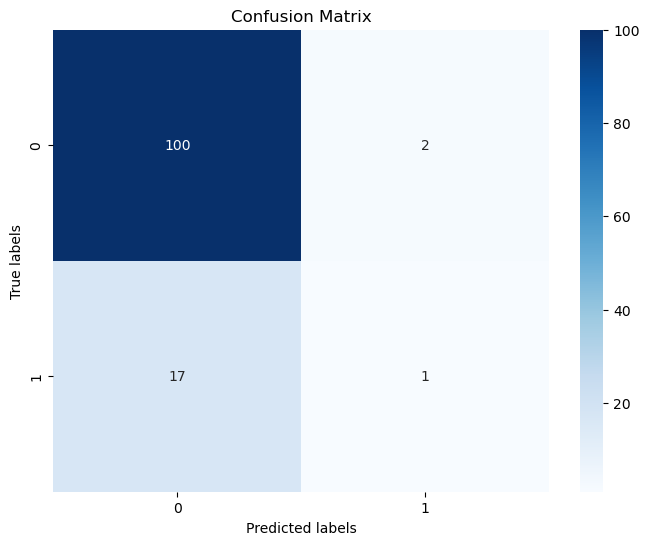

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Compare With SVM (Optional)

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [62]:
model = SVC(kernel='linear') 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9583333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       0.84      0.89      0.86        18

    accuracy                           0.96       120
   macro avg       0.91      0.93      0.92       120
weighted avg       0.96      0.96      0.96       120

